In [1]:
import itertools
import numpy as np
import tskit as tsk
import pyslim as psl
import matplotlib.pyplot as plt

In [2]:
def load_and_recapitate(f, mu=None, seed=None):
    if seed is None:
        seed = np.random.randint(0, 2**32-1, 1)
    tr = psl.load(f)
    md = tr.metadata['SLiM']['user_metadata']
    rbp, N = [md[k][0] for k in ('rbp', 'N')]
    rtr = tr.recapitate(recombination_rate=rbp, random_seed=seed)
    if mu is not None:
        rtr.tables.mutations.clear()
        rtr = msp.sim_mutations(rtr, rate=mu, keep=False, random_seed=seed, model=msp.InfiniteSites())
    return rtr

files = {rbp: f"inversion_{rbp}.trees" for rbp in [1e-7, 1e-8]}
ts = {rbp: load_and_recapitate(file) for rbp, file in files.items()}

In [3]:
# same for both
region_length = ts[1e-07].metadata['SLiM']['user_metadata']['region_length'][0]
inversion = ts[1e-07].metadata['SLiM']['user_metadata']['inversion_coords']
N = ts[1e-07].metadata['SLiM']['user_metadata']['N'][0]

pis = {rbp: ts.diversity(windows='trees', mode='branch') for rbp, ts in ts.items()}
xs = {rbp: np.cumsum([t.span for t in ts.trees()]) for rbp, ts in ts.items()}

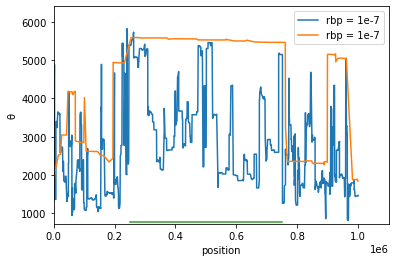

In [5]:
fig, ax = plt.subplots()
for rbp in pis:
    ax.plot(xs[rbp], pis[rbp], label='rbp = 1e-7')
y = np.fromiter(itertools.chain(*pis.values()), dtype='f')
min_y, max_y = np.min(y), np.max(y)
ax.plot(inversion, 2*[0.95*min_y])
ax.set_xlim(0, region_length*1.1)
ax.set_ylim(min_y*0.9, max_y*1.1)
ax.set_ylabel("θ")
ax.set_xlabel("position")
plt.legend(loc='upper right')